In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']
mpl.rcParams['axes.unicode_minus']=False

import matplotlib.style as psl
print(plt.style.available)
# 查看样式列表
psl.use('ggplot')

% matplotlib inline

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [2]:
#读取数据xls的数据,其实为csv的文件
def loadCsv(file,date_time):
    dataf = pd.read_csv(file, encoding='GB18030', delimiter='\t', header=1).drop('Unnamed: 8', axis=1)
    dataf['savetime'] = pd.to_datetime(date_time, format='%Y-%m-%d')
    return dataf

#读取数据xls的数据，真实xls
def loadExl(file,date_time):
    dataf = pd.read_excel(file, encoding='utf8', header=1)
    dataf['savetime'] = pd.to_datetime(date_time, format='%Y-%m-%d')
    return dataf

#列名重新定义
def reName(df, n):
    df.columns = n
    return df

#文件合成工厂(软件导出数据)
def loadExcFac(path,date_time,columnsName,nums):
    name1 = 'Table'
    name2 = '.xls'
    shuju = pd.DataFrame(columns=columnsName)
    for i in nums:
        name = path + name1 + str(i) + name2
        dateTime = date_time + '-' + str(i)
        df = loadCsv(name, dateTime)
        df = reName(df, columnsName)
        df['涨幅%'] = df['涨幅%'].str.strip("%").astype(float)/100
        shuju = shuju.append(df, ignore_index=True)
    return shuju

#文件合成工厂(手动调整的xls)
def loadExc2Fac(path,date_time,columnsName,nums):
    name1 = 'Table'
    name2 = '.xls'
    shuju = pd.DataFrame(columns=columnsName)
    for i in nums:
        name = path + name1 + str(i) + name2
        dateTime = date_time + '-' + str(i)
        df = loadExl(name, dateTime)
        df = reName(df, columnsName)
        df['涨幅%'] = df['涨幅%']
        shuju = shuju.append(df, ignore_index=True)
    return shuju

#合并数据
def combineDf(df1,*dfs): 
    for dfi in dfs:
        df1 = df1.append(dfi, ignore_index=True)
    return df1

#str_data = '/home/sunmd/stock/shuju.xlsx'
str_data = r'C:\Users\sun-m\Desktop\stock\shuju.xlsx'

#读数据表
def read_data():
    return pd.read_excel(str_data)

#写数据表
def save_data(df):
    df.to_excel(str_data)

In [13]:
#数据整合1
#file_path = r'/home/sunmd/stock/'
file_path = 'C:/Users/sun-m/Desktop/stock/'
file_date = '2018-05'
columns_name = ['代码', '名称', '涨幅%', '净流入', '大流入', '大流出', '中流入', '中流出', '统计时间']

#软件导入数据
df1 = loadExcFac(file_path, file_date, columns_name, list(range(14,18)))
df1

#手动导入数据
df2 = loadExc2Fac(file_path, file_date, columns_name,[18,21,22])

df3 = loadExcFac(file_path, file_date, columns_name, list(range(23,26)))

df4 = loadExcFac(file_path, file_date, columns_name, list(range(28,32)))

df5 = loadExcFac(file_path, '2018-06', columns_name, [1,4])

df = combineDf(df1, df2, df3, df4, df5)

save_data(df)
df[df['统计时间']=='2018-05-21'].head()

,代码,名称,涨幅%,净流入,大流入,大流出,中流入,中流出,统计时间
329,881124,电子制造,0.0278,721656150,2431351000,1843211350,1787345400,1653828900,2018-05-21
330,881106,石油矿业开采,0.0261,121265200,467542540,381483220,377805080,342599200,2018-05-21
331,881129,通信设备,0.0261,1406763260,4068568000,2771347940,3225854100,3116310900,2018-05-21
332,881148,港口航运,0.0253,152915780,787237800,637941520,725615000,721995500,2018-05-21
333,881161,酒店及餐饮,0.0251,71796124,170063484,89721610,204924380,213470130,2018-05-21


In [20]:
#输出样式
df = read_data()
def rl_style(s):
    lst = []
    if s['涨幅%'] < 0:
        color = 'green'
    elif s['涨幅%'] > 0:
        color = 'red'
    else:
        color = 'white'
    lst.append('color:%s' % color)
    
    if s['净流入'] < 0:
        color = 'green'
    elif s['净流入'] > 0:
        color = 'red'
    else:
        color = 'white'
    lst.append('color:%s' % color)
    
    lst.append('color:red')
    lst.append('color:green')
    lst.append('color:red')
    lst.append('color:green')
    return lst

#print(df['涨幅%'].astype(np.float))
mystl = df.style.apply(rl_style,axis=1, subset=['涨幅%', '净流入',
                                        '大流入', '大流出',
                                        '中流入', '中流出']).format({'涨幅%':"{:+.2%}"}).\
bar(subset=['涨幅%','净流入'], align='mid', color=['#5fba7d', '#d65f5f'], width=100)

In [18]:
df[df['统计时间']=='2018-06-04'].sort_values('净流入',ascending=False)\
.style.use(mystl.export()).format({'涨幅%':"{:+.2%}"})

,代码,名称,涨幅%,净流入,大流入,大流出,中流入,中流出,统计时间
987,881156,保险及其他,+0.37%,2066018800,3241621520,1463558400,1572981800,1285026140,2018-06-04 00:00:00
988,881133,饮料制造,+1.10%,1973020200,5590533100,3684946300,2954852800,2887419400,2018-06-04 00:00:00
989,881153,房地产开发,+0.38%,1625832700,3212633700,1745221450,2251368500,2092948100,2018-06-04 00:00:00
990,881131,白色家电,+1.69%,1063622420,3346410900,2511023980,2044499900,1816264400,2018-06-04 00:00:00
991,881155,银行,+0.49%,856112520,2778867190,1769294370,1543373300,1696833600,2018-06-04 00:00:00
992,881134,食品加工制造,+0.25%,405175150,1886318900,1493704750,1644203200,1631642200,2018-06-04 00:00:00
993,881151,机场航运,+1.71%,282257650,535943700,380387070,558586530,431885510,2018-06-04 00:00:00
994,881121,半导体及元件,+0.88%,183620110,1342372920,1169975010,1594112900,1582890700,2018-06-04 00:00:00
995,881147,环保工程,-0.40%,175742770,705060620,488618880,481718490,522417460,2018-06-04 00:00:00
996,881112,钢铁,+0.57%,170686510,812565830,662193490,646764480,626450310,2018-06-04 00:00:00


In [21]:
#按分类进行统计
df_grp_name = df.groupby('名称').sum()
df_grp_name.sort_values(['涨幅%','净流入'], ascending=False)\
.style.use(mystl.export()).format({'涨幅%':'{:+.2%}'})

,代码,涨幅%,净流入,大流入,大流出,中流入,中流出
名称,,,,,,,
食品加工制造,14098144,+12.85%,-507943700,29182344390,28000953330,27052826600,28742161330
饮料制造,14098128,+11.20%,3013670540,41822687450,38908220440,35425361800,35326158270
交运设备服务,14098048,+8.54%,-743958169,1724957477,2136566707,2186607534,2518956473
酒店及餐饮,14098576,+7.83%,-122930210,1478428800,1336224991,2476243310,2741377329
农产品加工,14097648,+5.02%,-698631759,6916991579,7132468379,9828802170,10311957130
家用轻工,14098224,+3.70%,-1843844953,7084214559,8282189902,10853674150,11499543760
景点及旅游,14098560,+3.14%,216782911,5037830248,4769221860,5767480490,5819305970
零售,14098528,+2.77%,660050000,21767119210,20289210700,21872234500,22690093010
白色家电,14098096,+2.18%,-2789640570,23344310320,25457808300,19340784270,20016926860


In [11]:
#按时间进行统计
df_grp_time = df.groupby('统计时间').sum()
df_grp_time.style.use(mystl.export()).format({'涨幅%':'{:+.2%}'})

,代码,涨幅%,净流入,大流入,大流出,中流入,中流出
统计时间,,,,,,,
2018-05-14 00:00:00,58154811,+67.77%,-1258281673,64816559462,65543827764,67692307130,68223320501
2018-05-15 00:00:00,58154811,+67.77%,-1258281673,64816559462,65543827764,67692307130,68223320501
2018-05-16 00:00:00,58154811,-19.93%,-26761806375,61681776250,76753583821,66046737397,77736736201
2018-05-17 00:00:00,58154811,+47.89%,-2334041356,64343898643,63453002844,65908900895,69133838050
2018-05-18 00:00:00,57273704,+40.00%,-2778424536,63174608623,62631536794,65048465895,68369962260
2018-05-21 00:00:00,57273690,+86.83%,-2967360410,78432266686,80974519049,78862997789,79288105836
2018-05-22 00:00:00,57273709,+33.23%,-21456455679,65566023810,80202437921,74488566776,81308608344
2018-05-23 00:00:00,58154811,-75.15%,-54019399064,60754178190,95650870727,72709147594,91831854027
2018-05-24 00:00:00,58154811,-8.09%,-28686735528,53433460547,71457986580,63720974223,74383183718


In [14]:
#单个板块进行查看
df[df['名称'] == '保险及其他'].style.use(mystl.export()).format({'涨幅%':'{:+.2%}'})

,代码,名称,涨幅%,净流入,大流入,大流出,中流入,中流出,统计时间
59,881156,保险及其他,+0.21%,-466725960,1410152470,1688573230,857942800,1046248000,2018-05-14 00:00:00
125,881156,保险及其他,+0.21%,-466725960,1410152470,1688573230,857942800,1046248000,2018-05-15 00:00:00
185,881156,保险及其他,-1.06%,-1649123130,1208400990,2545370360,950035570,1262189330,2018-05-16 00:00:00
217,881156,保险及其他,+0.90%,623323550,2060641080,1413592670,1064984410,1088709270,2018-05-17 00:00:00
282,881156,保险及其他,+0.90%,623323550,2060641080,1413592670,1064984410,1088709270,2018-05-18 00:00:00
369,881156,保险及其他,+1.12%,-29612980,2174283820,2210961550,1205841330,1198776580,2018-05-21 00:00:00
451,881156,保险及其他,-0.24%,-1296955130,1071667100,2167734260,1004141060,1205029030,2018-05-22 00:00:00
514,881156,保险及其他,-1.82%,-1686969900,1083319660,2384771970,927035490,1312553060,2018-05-23 00:00:00
580,881156,保险及其他,-0.72%,-837770690,956263720,1682266600,788304850,900072660,2018-05-24 00:00:00
627,881156,保险及其他,-0.89%,-388847540,961734400,1165725790,845898140,1030754290,2018-05-25 00:00:00


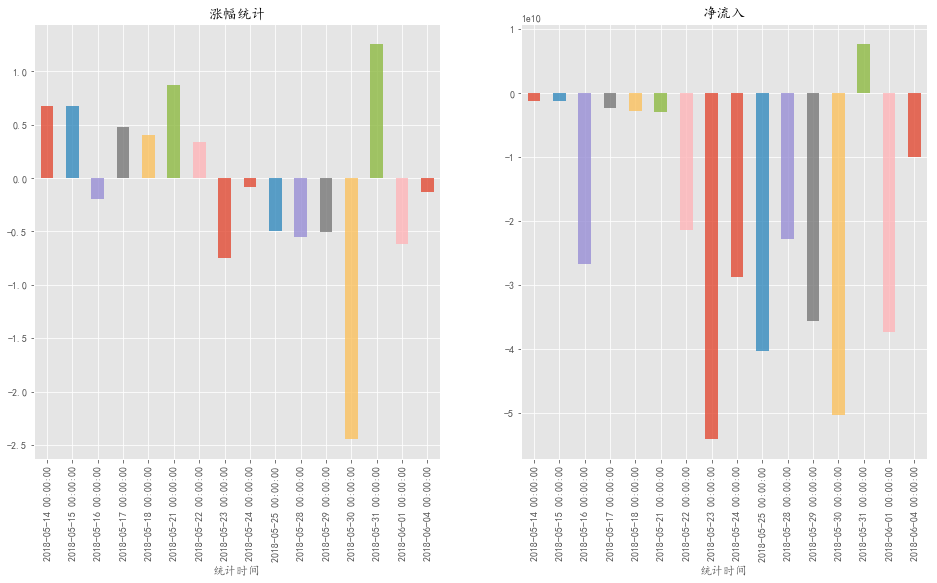

In [23]:
#整体版本的调查
fig_time,axis_time = plt.subplots(1,2, figsize=(16,8))

df_grp_time['涨幅%'].plot(kind='bar', ax=axis_time[0], alpha=0.8, title='涨幅统计')

df_grp_time['净流入'].plot(kind='bar', ax=axis_time[1], alpha=0.8, title='净流入')
plt.savefig(r'C:\Users\sun-m\Desktop\stock\DataAnlysisDemo-master\pic.png',
            dpi=400,
            bbox_inches = 'tight')

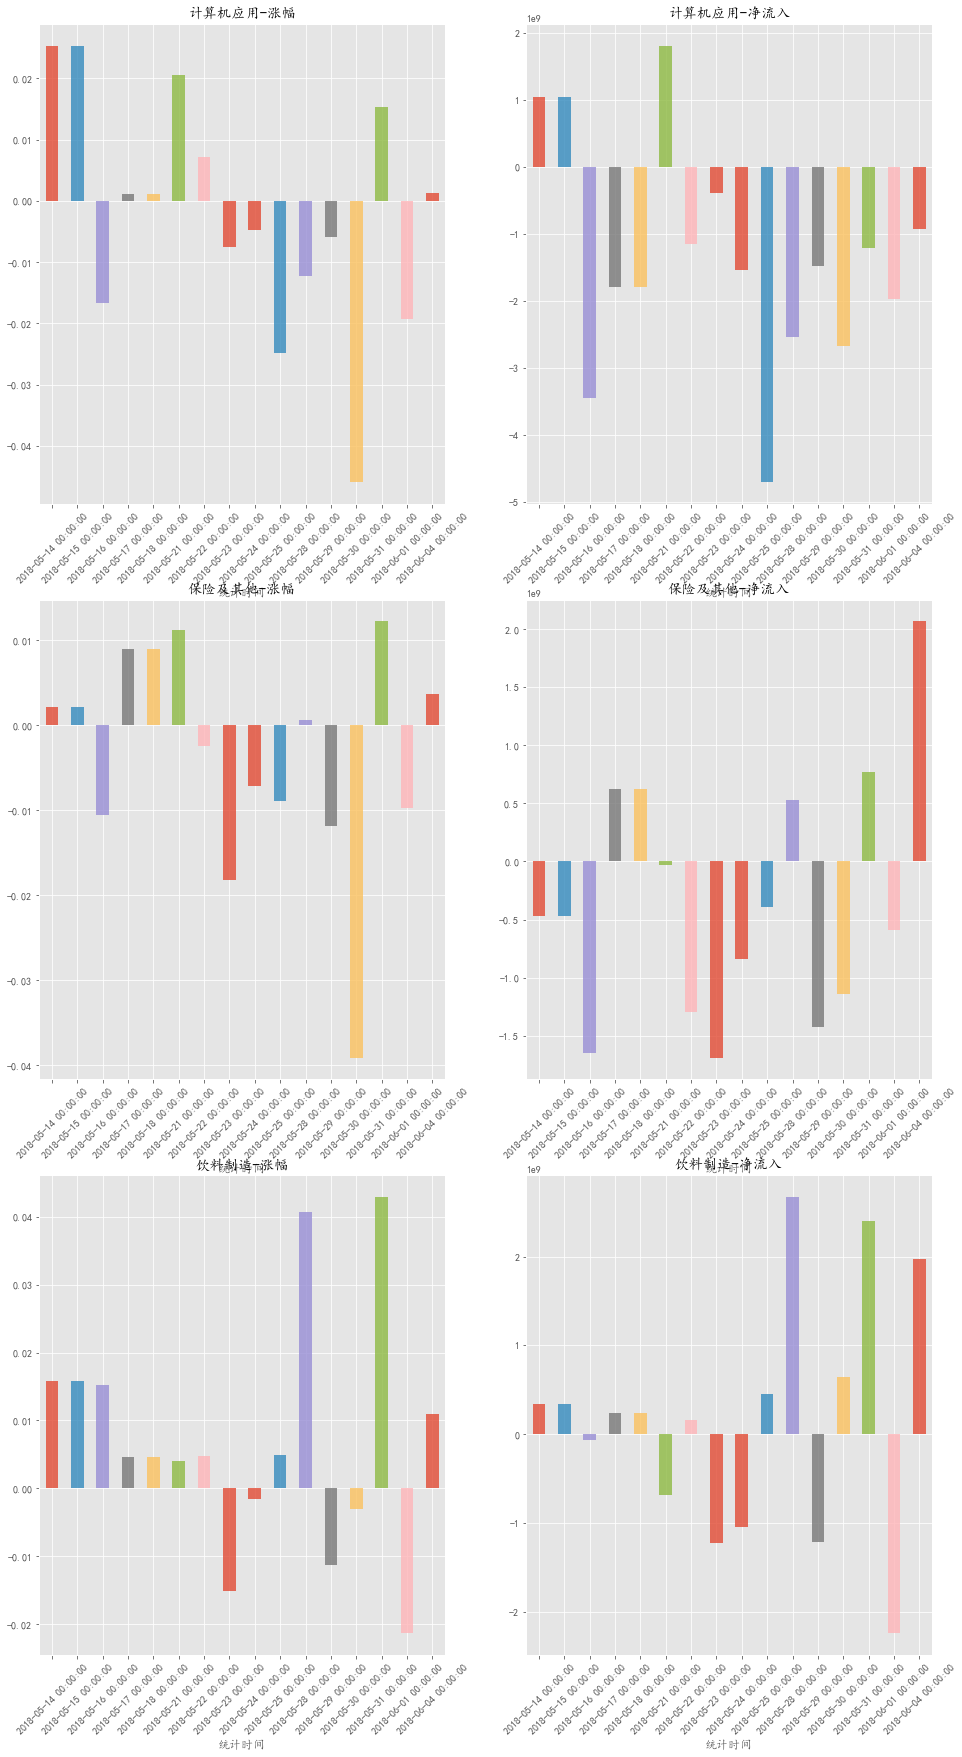

In [26]:
df_gx = df.copy()
df_gx.index = df_gx['统计时间']

#列出每个模块的涨幅和净流入
#name_list = df_grp_name.index
name_list = ['计算机应用', '保险及其他', '饮料制造']
fig_gg, axis_gg = plt.subplots(len(name_list), 2, figsize=(16,10*len(name_list)))
num = 0
for name in name_list:
    temp_df = df_gx[df_gx['名称'] == name]
    temp_df['涨幅%'].plot(kind='bar', alpha=0.8, ax=axis_gg[num][0], rot=45, title=name+'-涨幅')
    temp_df['净流入'].plot(kind='bar', alpha=0.8, ax=axis_gg[num][1], rot=45, title=name+'-净流入')
    num = num + 1
    plt.savefig(r'C:\Users\sun-m\Desktop\stock\DataAnlysisDemo-master\pic'+str(num)+'.png',
            dpi=400,
            bbox_inches = 'tight')
#for name in name_list:
#    print(df_gx[df_gx['名称'] == name]['涨幅%'].head())


In [29]:
#查询异常值
def detectoutliers2(list):
 
    outlier_indices = []  
    # iterate over features(columns)  
  
        # 1st quartile (25%)  
    Q1 = list.quantile(q=0.25)
    # 3rd quartile (75%)  
    Q3 = list.quantile(0.75)  
    # Interquartile range (IQR)  
    IQR = Q3 - Q1  
    # outlier step  
    outlier_step = 1.5 * IQR  
#    print(Q1 - outlier_step)
#    print(Q3 + outlier_step)
    # Determine a list of indices of outliers for feature col  
    outlier_list_col = list[(list < Q1 - outlier_step) | (list > Q3 + outlier_step )]  
  
    return outlier_list_col 

name_list = df_grp_name.index

#建立空的df
outliers_list_zf = pd.DataFrame(columns=columns_name)
#涨幅异常值
for name in name_list:
    lst = detectoutliers2(df[df['名称'] == name]['涨幅%'].sort_values())
    outliers_list_zf = outliers_list_zf.append(df[df['名称'] == name][df[df['名称'] == name]['涨幅%']\
                                                                    .isin(lst)], ignore_index=False)
outliers_list_zf.drop_duplicates().style.use(mystl.export()).format({'涨幅%':'{:+.2%}'})


,代码,名称,涨幅%,净流入,大流入,大流出,中流入,中流出,统计时间
847,881118,专用设备,-4.78%,-1576033770,839959430,1634775000,1389149900,2170368100,2018-05-30 00:00:00
852,881119,仪器仪表,-5.66%,-218720130,143552967,261312007,246231470,347192560,2018-05-30 00:00:00
826,881164,传媒,-4.32%,-1322884050,1058817430,1681975780,1559571900,2259297600,2018-05-30 00:00:00
821,881156,保险及其他,-3.91%,-1141262960,992803640,1805969290,990300960,1318398270,2018-05-30 00:00:00
843,881122,光学光电子,-4.63%,-1945691040,1254625640,2522996680,1435256600,2112576600,2018-05-30 00:00:00
834,881150,公交,-4.46%,-55735693,39112049,54276472,102826890,143398160,2018-05-30 00:00:00
811,881149,公路铁路运输,-3.49%,-283323640,100394092,250440622,225333570,358610680,2018-05-30 00:00:00
820,881138,包装印刷,-3.84%,-259230119,237654911,367889960,365200790,494195860,2018-05-30 00:00:00
845,881109,化学制品,-4.66%,-3047706110,1946986290,3895880900,2929007400,4027818900,2018-05-30 00:00:00
827,881140,化学制药,-4.33%,-1838619470,2101713130,3293521200,2557672900,3204484300,2018-05-30 00:00:00


In [28]:

#建立空的df
outliers_list_jlr = pd.DataFrame(columns=columns_name)
#净流入异常值
for name in name_list:
    lst = detectoutliers2(df[df['名称'] == name]['净流入'].sort_values())
    outliers_list_jlr = outliers_list_jlr.append(df[df['名称'] == name][df[df['名称'] == name]['净流入']\
                                                                    .isin(lst)], ignore_index=False)
outliers_list_jlr.sort_values('统计时间').drop_duplicates().style.use(mystl.export()).format({'涨幅%':'{:+.2%}'})


,代码,名称,涨幅%,净流入,大流入,大流出,中流入,中流出,统计时间
57,881150,公交,+0.26%,100375506,115371494,25457668,63938527,53476847,2018-05-14 00:00:00
123,881150,公交,+0.26%,100375506,115371494,25457668,63938527,53476847,2018-05-15 00:00:00
133,881161,酒店及餐饮,+2.56%,162964641,239089578,89998367,207955610,194082180,2018-05-16 00:00:00
199,881106,石油矿业开采,+3.07%,535910430,803562600,305732280,333498680,295418570,2018-05-17 00:00:00
212,881123,其他电子,+1.06%,207319280,876139090,691849970,751813230,728783070,2018-05-17 00:00:00
198,881107,采掘服务,+7.89%,444383180,1169290020,821466050,860435000,763875790,2018-05-17 00:00:00
202,881108,基础化学,+2.52%,1435412890,2693786950,1562802460,1924507300,1620078900,2018-05-17 00:00:00
201,881105,煤炭开采,+2.80%,1581698710,2184796360,1151631960,1707195900,1158661590,2018-05-17 00:00:00
264,881106,石油矿业开采,+3.07%,535910430,803562600,305732280,333498680,295418570,2018-05-18 00:00:00
267,881108,基础化学,+2.52%,1435412890,2693786950,1562802460,1924507300,1620078900,2018-05-18 00:00:00


In [88]:
df_merge = outliers_list_zf.merge(outliers_list_jlr, how='inner')
df_merge.sort_values('统计时间').style.use(mystl.export()).format({'涨幅%':'{:+.2%}'})

,代码,名称,涨幅%,净流入,大流入,大流出,中流入,中流出,统计时间
3,881105,煤炭开采,+2.80%,1581698710,2184796360,1151631960,1707195900,1158661590,2018-05-17 00:00:00
8,881107,采掘服务,+7.89%,444383180,1169290020,821466050,860435000,763875790,2018-05-17 00:00:00
4,881105,煤炭开采,+2.80%,1581698710,2184796360,1151631960,1707195900,1158661590,2018-05-18 00:00:00
9,881107,采掘服务,+7.89%,444383180,1169290020,821466050,860435000,763875790,2018-05-18 00:00:00
5,881105,煤炭开采,-3.81%,-2541751200,866375260,2596153240,1099912290,1911885500,2018-05-23 00:00:00
0,881138,包装印刷,-3.84%,-259230119,237654911,367889960,365200790,494195860,2018-05-30 00:00:00
1,881139,家用轻工,-3.58%,-537516996,356747144,653837810,627667750,868094080,2018-05-30 00:00:00
6,881105,煤炭开采加工,-4.74%,-1073281863,310814077,933254310,531032150,981873780,2018-05-30 00:00:00
7,881159,贸易,-4.64%,-292455880,92297367,220485377,198304930,362572800,2018-05-30 00:00:00
10,881158,零售,-3.18%,-642170280,1482510930,1737786810,1570548800,1957443200,2018-05-30 00:00:00
